In [1]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics.pairwise import cosine_distances
from sklearn.metrics.pairwise import euclidean_distances

from sklearn.preprocessing import MinMaxScaler

from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem import AllChem
from rdkit.Chem import Draw

In [2]:
data_dir = "../data/processed"
image_dir = "../images"

In [3]:
df_cmpds_original = pd.read_pickle(os.path.join(data_dir, "BBBC021_original_compounds_props.pickle"))
df_cmpds_original = df_cmpds_original.fillna(-999)

In [4]:
df_cmpds_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Columns: 214 entries, Image_Metadata_Compound to fr_urea
dtypes: float64(106), int64(104), object(4)
memory usage: 58.6+ KB


In [5]:
compounds = df_cmpds_original["Image_Metadata_Compound"].to_numpy()
descriptors = df_cmpds_original[df_cmpds_original.columns[4:]].to_numpy()
moas = df_cmpds_original["Image_Metadata_MoA"].unique()

In [6]:
def create_descr_dist_matix(descr):
    scaler = MinMaxScaler()
    scaled_descr = scaler.fit_transform(descr)
    dist_matrix = euclidean_distances(scaled_descr, scaled_descr)
    return dist_matrix

In [7]:
distance_matrix = create_descr_dist_matix(descriptors)

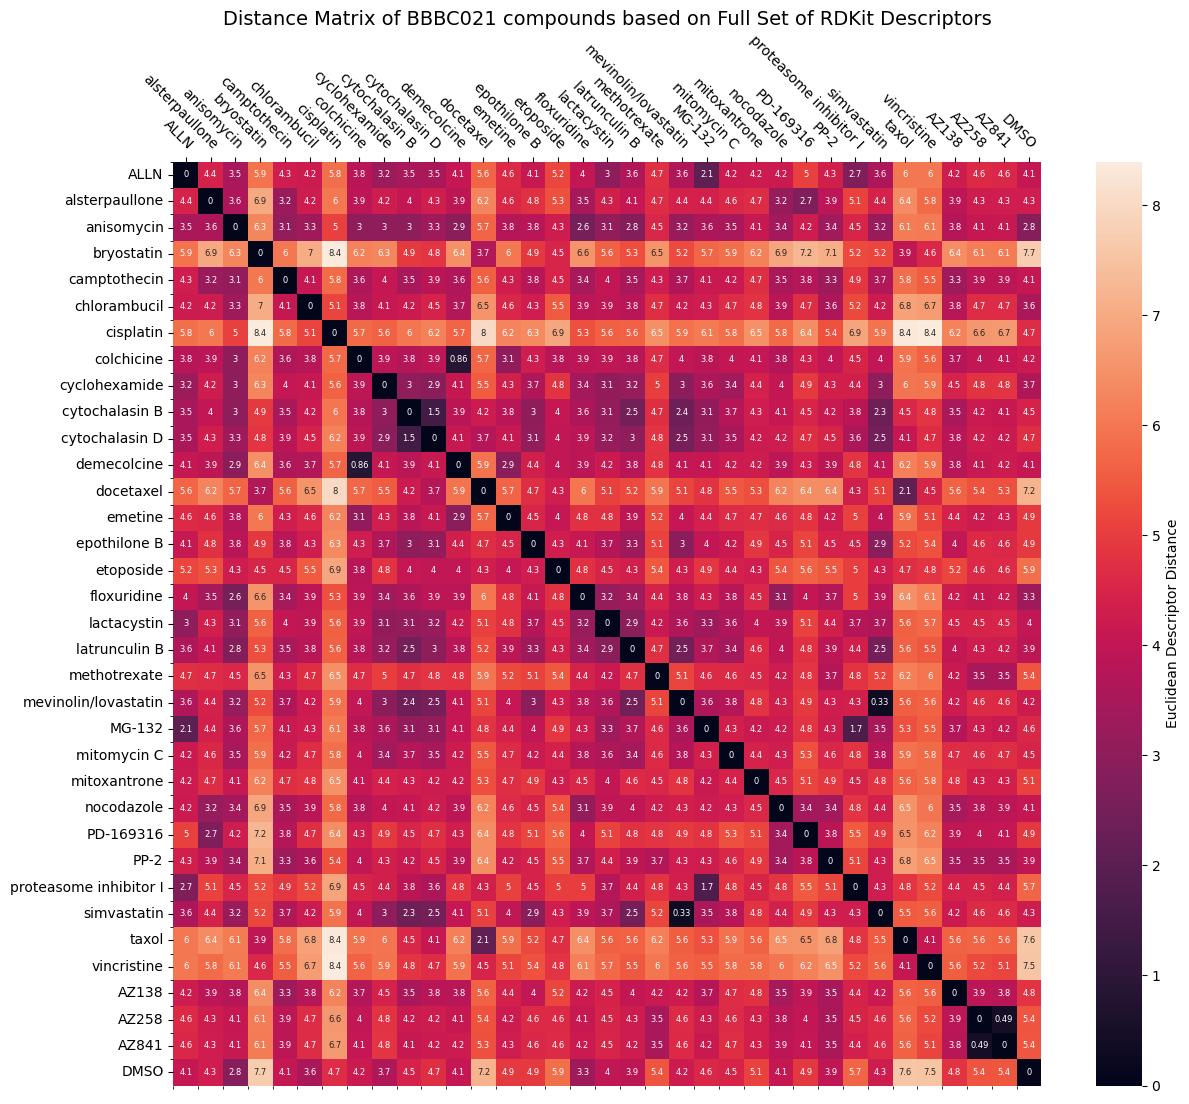

In [8]:
fig, ax = plt.subplots(figsize=(14,12))

sns.heatmap(distance_matrix, 
            annot=True, 
            annot_kws={"fontsize":6, "ha": "center"}, 
            fmt=".2g", 
            cbar_kws={'label': 'Euclidean Descriptor Distance'}, 
            ax=ax)
ax.set_yticks(range(len(compounds)), minor=True)
ax.set_yticklabels(compounds)
ax.set_xticks(range(len(compounds)), minor=True)
ax.set_xticklabels(compounds)
ax.tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)
ax.set_title("Distance Matrix of BBBC021 compounds based on Full Set of RDKit Descriptors", fontsize=14)
plt.setp(ax.get_xticklabels(), rotation=-45, ha="right", rotation_mode="anchor")
plt.setp(ax.get_yticklabels(), rotation=0, ha="right", rotation_mode="anchor")

plt.show()

In [9]:
fig.savefig(os.path.join(image_dir, "Descriptor_distance_matrix.png"))

In [10]:
def generate_moa_dist_matrix(df, moa, ax):
    cmpd_list = df[df["Image_Metadata_MoA"] == moa]["Image_Metadata_Compound"].to_numpy()
    cmpd_idx = [i for i, c in enumerate(compounds) if c in cmpd_list]
    moa_dist = np.zeros((len(cmpd_idx), len(cmpd_idx)))
    for k in range(len(cmpd_idx)):
        for l in range(len(cmpd_idx)):
            moa_dist[k][l] = distance_matrix[cmpd_idx[k]][cmpd_idx[l]]

    sns.heatmap(moa_dist, 
                annot=True, 
                annot_kws={"fontsize":8, "ha": "center"}, 
                fmt=".4g", 
                cbar_kws={'label': 'Euclidean Descriptor Distance', 'shrink': 0.6},
                square=True,
                vmin=0,
                vmax=10,
                ax=ax)
    ax.set_yticks(range(len(cmpd_idx)), minor=True)
    ax.set_yticklabels(cmpd_list)
    ax.set_xticks(range(len(cmpd_idx)), minor=True)
    ax.set_xticklabels(cmpd_list)
    ax.tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)
    ax.set_title(f"Distance Matrix MoA - {moa}", fontsize=10)
    plt.setp(ax.get_xticklabels(), rotation=-45, ha="right", rotation_mode="anchor")
    plt.setp(ax.get_yticklabels(), rotation=0, ha="right", rotation_mode="anchor")

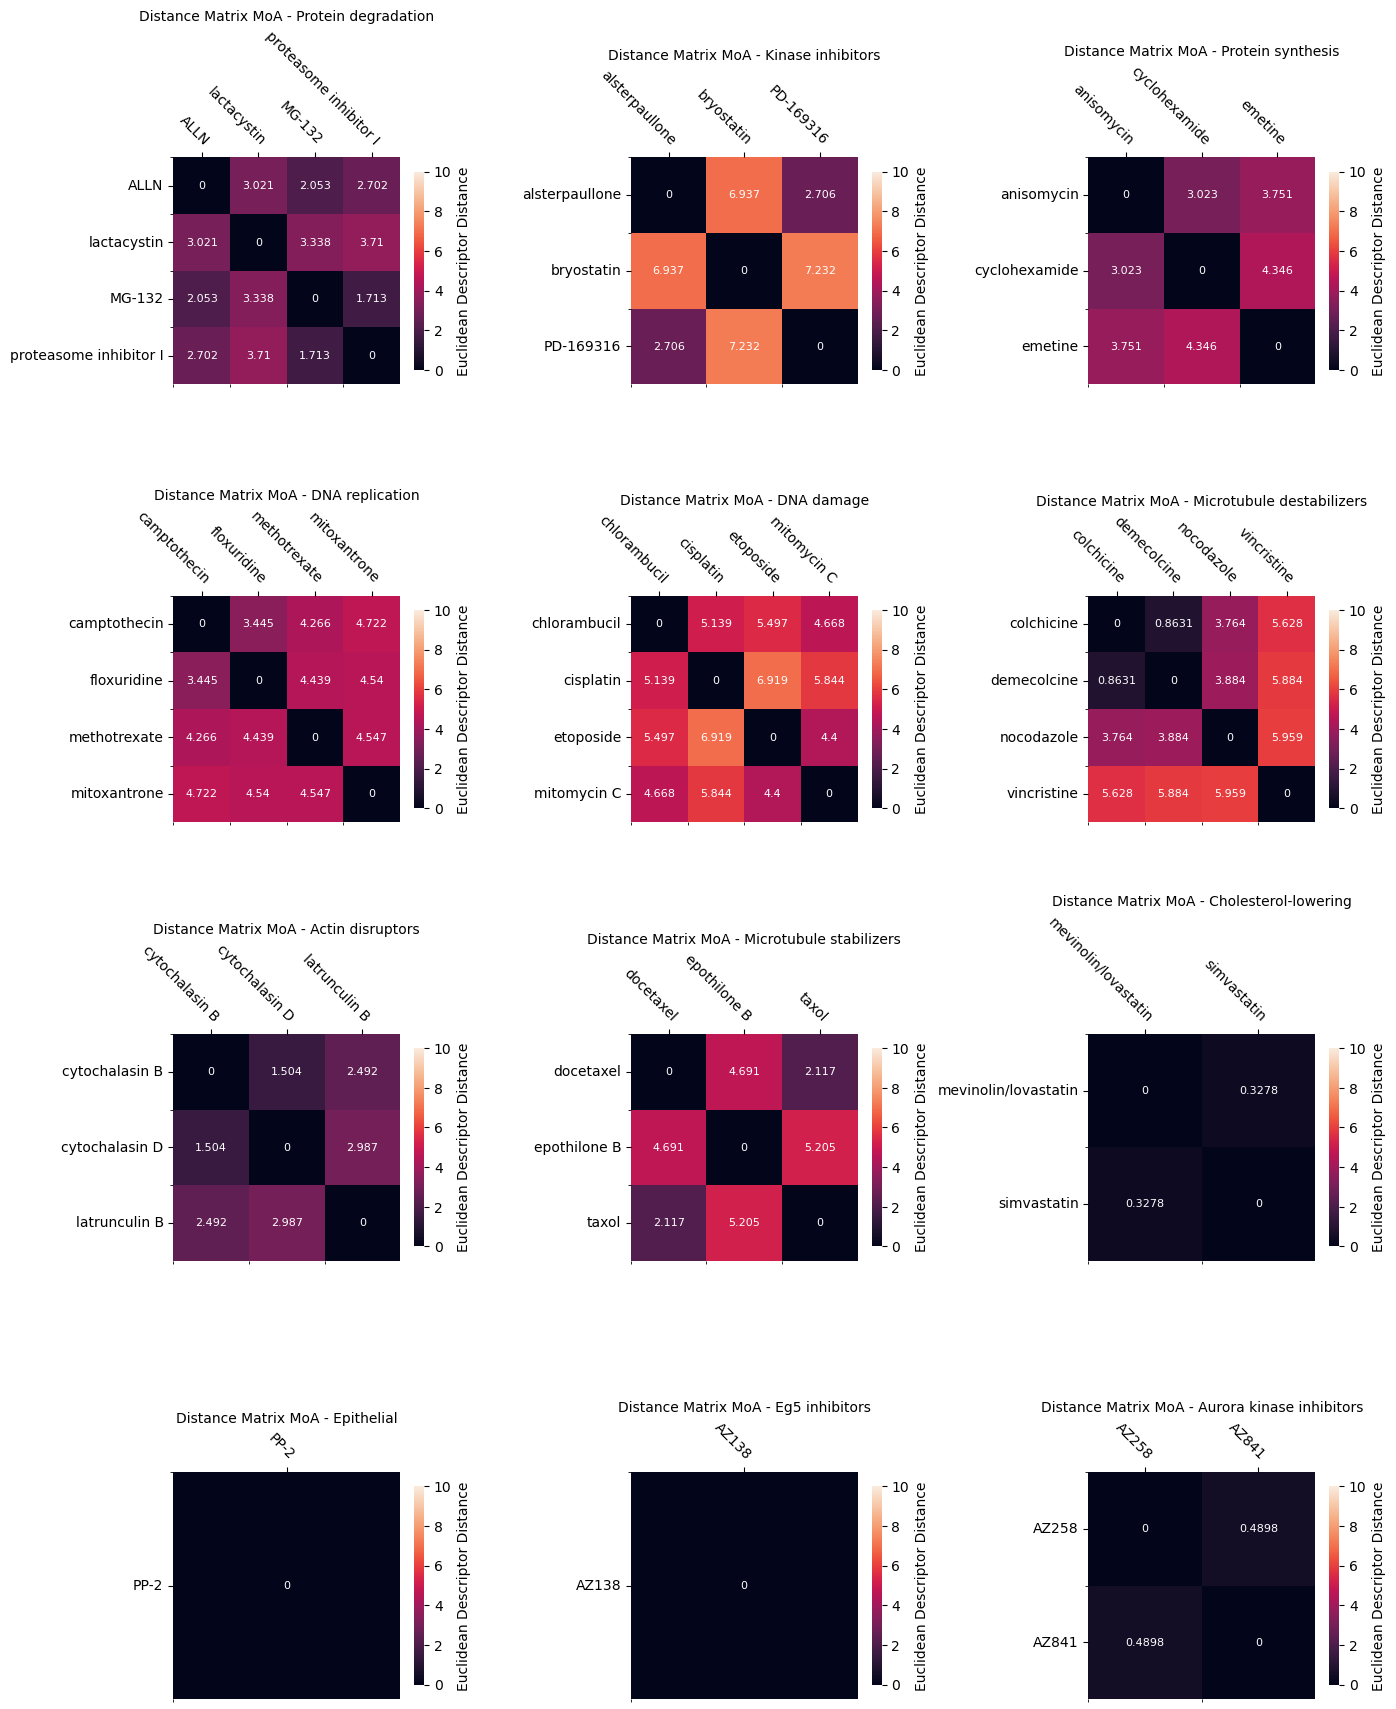

In [11]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(14,18))
for i, ax in enumerate(axes.flat):
    if moas[i] == "DMSO":
        continue
    # print(moas[i])
    generate_moa_dist_matrix(df_cmpds_original, moas[i], ax)
plt.tight_layout()
plt.show()

In [12]:
fig.savefig(os.path.join(image_dir, "Descriptor_distance_matrix_by_MoA.png"))